### MNIST Support Vector Machine

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.svm import LinearSVC, SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [16]:
digits =datasets.load_digits()

digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [17]:
print(type (digits.data))
print(digits.data.shape)
print(digits.data[100])

<class 'numpy.ndarray'>
(1797, 64)
[ 0.  0.  0.  2. 13.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.
  5. 16.  5.  2.  0.  0.  0.  0. 15. 12.  1. 16.  4.  0.  0.  4. 16.  2.
  9. 16.  8.  0.  0.  0. 10. 14. 16. 16.  4.  0.  0.  0.  0.  0. 13.  8.
  0.  0.  0.  0.  0.  0. 13.  6.  0.  0.]


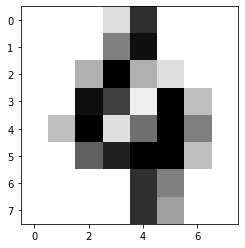

In [18]:
# Generate heatmap.
plt.imshow(
    digits.images[100],
    cmap=plt.cm.gray_r,
);

##### what is the actual class ?

In [19]:
digits.target[100]

4

##### Instantiate X and y variables : in this case, X is our actual data & y is our target 

In [20]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
    stratify=y
)

##### Instantiate support vector machine to fit , train and test our data.

In [21]:
svc =SVC()
svc.fit(X_train,y_train)

print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.99833748960931
0.98989898989899


#### we generate predictions from our testing data 

In [23]:

y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)


0.98989898989899

#### now, let's try to use different hyperparameter values 

In [26]:

svc_rbf = SVC (

    C = 100,
    kernel = "rbf",
    gamma = "scale"
)


svc_rbf.fit(X_train, y_train)
print(svc_rbf.score(X_train,y_train))
print(svc_rbf.score(X_test,y_test))

1.0
0.98989898989899


#### let's plot out a dataframe to show predicted and actual data

In [33]:
result = pd.DataFrame(svc_rbf.predict(X_test), columns =['predict'])
result['actual'] = y_test
result.head()


,predict,actual
0,6,6
1,2,2
2,3,3
3,2,2
4,2,2


##### let's find out the indices where predict != actual and print out in an array 

In [35]:
false_id = result[result['predict'] != result['actual']].index
false_id

Int64Index([56, 154, 223, 328, 347, 373], dtype='int64')

#### print images that show actual image then print it's correct data from 'false_id'.

In [38]:
def print_number(index):
    plt.imshow(digits.images[index],
               cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.show()
    print(f'The model guessed this was: {result["predict"].iloc[index]}.')
    print(f'This actually is: {result["actual"].iloc[index]}.')
    print()

#### let's show all the 'false_id' that was trained wrongly.

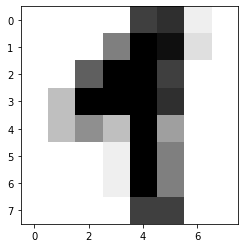

The model guessed this was: 1.
This actually is: 8.



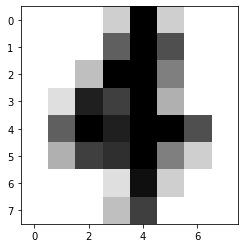

The model guessed this was: 9.
This actually is: 5.



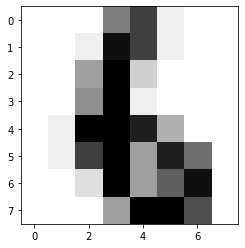

The model guessed this was: 4.
This actually is: 0.



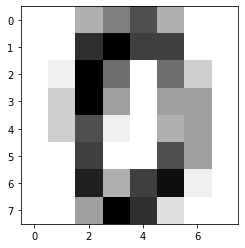

The model guessed this was: 1.
This actually is: 8.



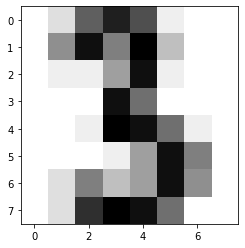

The model guessed this was: 1.
This actually is: 8.



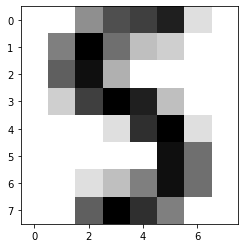

The model guessed this was: 7.
This actually is: 9.



In [39]:
for value in false_id:
    print_number(value)